In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# Load dataset
penguins = pd.read_csv("datasets/penguins.csv")
# or
# penguins = sns.load_dataset("penguins")

# Examine the first 5 rows of the penguin dataset
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [3]:
# Drop 'island', 'bill_depth_mm' and 'flipper_length_mm' for the example
# Rename the 'sex' label to 'gender'
# Drop NAs values
penguins = (
    penguins.drop(columns=["island", "bill_depth_mm", "flipper_length_mm"])
    .rename(columns={"sex": "gender"})
    .dropna()
)
penguins.head()

,species,bill_length_mm,body_mass_g,gender
0,Adelie,39.1,3750.0,male
1,Adelie,39.5,3800.0,female
2,Adelie,40.3,3250.0,female
4,Adelie,36.7,3450.0,female
5,Adelie,39.3,3650.0,male


In [4]:
# There are no missing values
penguins.count()

species           333
bill_length_mm    333
body_mass_g       333
gender            333
dtype: int64

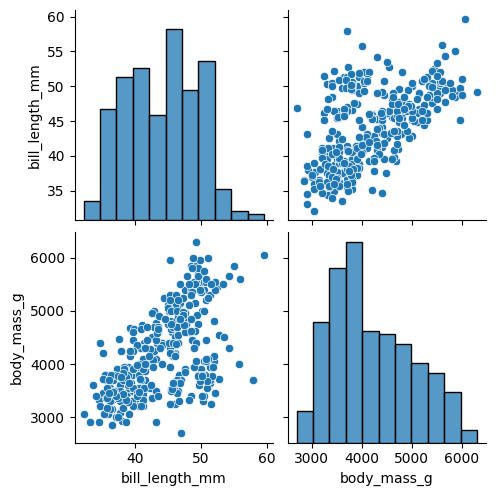

In [5]:
# Plot a scatter matrix from all the numerical columns
sns.pairplot(penguins)

In [6]:
# Prepare the data for linear regression
penguins_x = penguins[["species", "bill_length_mm", "gender"]]
penguins_y = penguins[["body_mass_g"]]

In [7]:
# Split the data into training and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    penguins_x, penguins_y, test_size=0.3, random_state=42
)

x_train.head()

,species,bill_length_mm,gender
27,Adelie,40.5,female
295,Chinstrap,49.2,male
305,Chinstrap,52.8,male
62,Adelie,37.6,female
182,Gentoo,47.3,male


In [8]:
# Import OLS function
from statsmodels.formula.api import ols

# The formula describes that body_mass_g (dependant) is related to bill_length_mm, gender, and species. C(...) indicates that is a categorical variable.
ols_formula = "body_mass_g ~ bill_length_mm + C(gender) + C(species)"

# Merge all the data in a dataframe
ols_data = pd.concat([x_train, y_train], axis=1)

ols_estimator = ols(formula=ols_formula, data=ols_data)
ols_model = ols_estimator.fit()

In [9]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     367.0
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           4.48e-98
Time:                        21:47:10   Log-Likelihood:                -1663.1
No. Observations:                 233   AIC:                             3336.
Df Residuals:                     228   BIC:                             3353.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1968.1372    322.608      6.101      0.000    1332.462    2603.812
C(gender)[T.male]         552.3007     52.714     10.477      0.000     448.432     656.169
C(species)[T.Chinstrap]  -288.1452    102.475     -2.812      0.005    -490.065     -86.225
C(species)[T.Gentoo]     1068.7972     85.792     12.458      0.000     899.751    1237.844
bill_length_mm             36.9026      8.658      4.262      0.000      19.843      53.962
==============================================================================
Omnibus:                        1.676   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.433   Jarque-Bera (JB):                1.550
Skew:                           0.092   Prob(JB):                        0.461
Kurtosis:                       2.646   Cond. No.                         756.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# Get predictions from the model
fitted_values = ols_model.predict(x_train)

# Calculate residuals
residuals = ols_model.resid
residuals

27    -262.692625
295    352.099236
305    369.249863
62     244.324926
182    -84.728252
          ...    
195   -669.604240
77       6.785270
112   -233.170542
281    602.010348
108   -199.126376
Length: 233, dtype: float64

In [11]:
fitted_values

27     3462.692625
295    4047.900764
305    4180.750137
62     3355.675074
182    5334.728252
          ...     
195    5419.604240
77     3893.214730
112    3433.170542
281    3347.989652
108    3374.126376
Length: 233, dtype: float64

Text(0, 0.5, 'Residuals')

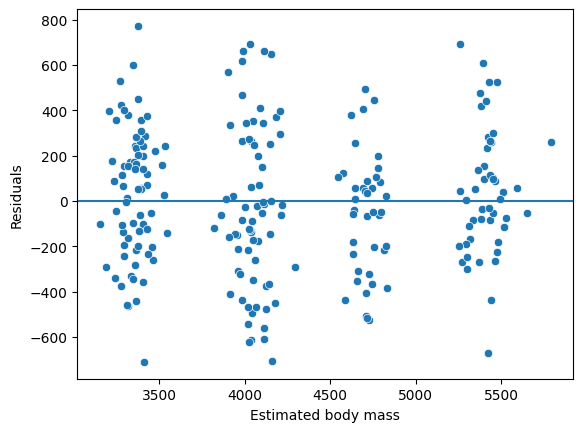

In [12]:
fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.axhline(0)
fig.set_xlabel("Estimated body mass")
fig.set_ylabel("Residuals")

Text(0.5, 1.0, 'Histogram of Residuals')

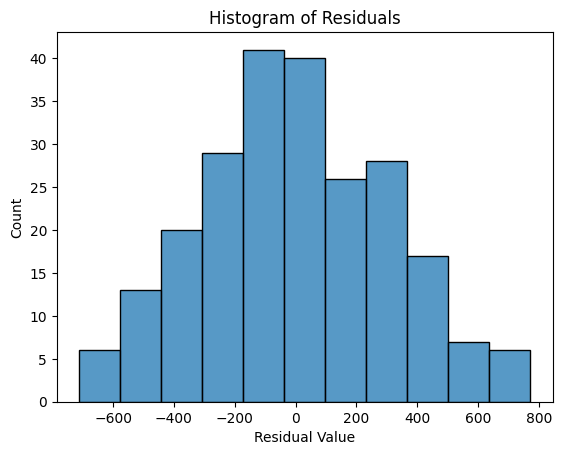

In [13]:
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")

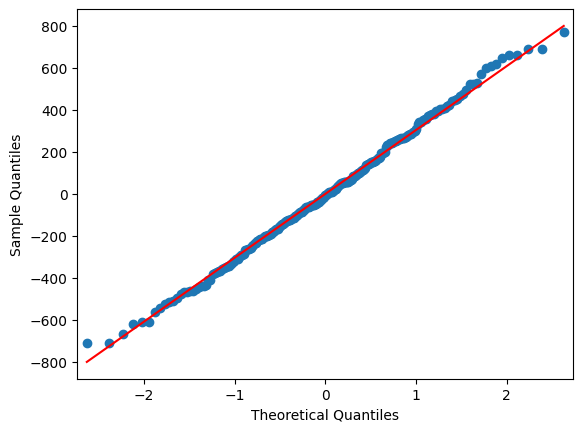

In [14]:
import statsmodels.api as sm

fig = sm.qqplot(residuals, line="s")